In [486]:
import pandas as pd
import seaborn as sns

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Airbnb Data Investigation

For this analysis I'm going to try to answer a few really high level questions about the available Airbnbs in this data:

1. What is the distribution of Airbnb prices?
1. What are the top contributing features?
1. Does the set of high value features change looking at different cities?
1. Could we use this analysis to help people make their Airbnb rentals more attractive?

There's a lot of complexity in this data and much more complex analysis are possible. I wanted to keep the scope of the questions fairly limited so if wouldn't balloon out of control!

First I defined a quick function to read in all three files from a directory which could be useful in the future, for now I am going to focus on the listings file.

## Get the data

In [2]:
def read_airbnb_data(data_dir):
    calendar = pd.read_csv(data_dir + 'calendar.csv')
    listings = pd.read_csv(data_dir + 'listings.csv')
    reviews = pd.read_csv(data_dir + 'reviews.csv')
    return (calendar, listings, reviews)

Now we will read in the boston files.

In [3]:
boston_dir = 'boston-airbnb-open-data/'
boston_calendar_raw, boston_listings_raw, boston_reviews_raw = read_airbnb_data(boston_dir)

In [4]:
boston_listings_raw.shape

(3585, 95)

Looks like we have 95 columns and around 3500 listings!

In [5]:
boston_listings_raw.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Taking a look at the first few records it's clear there are quite a few difficult to use and not useful features. We can look more closely at the full list and then decide if we will drop some.

In [6]:
boston_listings_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
id                                  3585 non-null int64
listing_url                         3585 non-null object
scrape_id                           3585 non-null int64
last_scraped                        3585 non-null object
name                                3585 non-null object
summary                             3442 non-null object
space                               2528 non-null object
description                         3585 non-null object
experiences_offered                 3585 non-null object
neighborhood_overview               2170 non-null object
notes                               1610 non-null object
transit                             2295 non-null object
access                              2096 non-null object
interaction                         2031 non-null object
house_rules                         2393 non-null object
thumbnail_url                       2986

## Data Cleaning

Here's a scratch comment that I used when I went through every single column and decided how to treat them:

In [7]:
# to drop: id, scrape_id, last_scraped, experiences_offered, host_id, host_name, neighbourhood_group_cleansed, country_code, country, has_availability, calendar_last_scraped, license, jurisdiction_names
#done
# possibly to drop: square_feet
#done

# location to handle? : host_location, street, city, state, zipcode, market, smart_location, latitude, longitude

# dates to handle: host_since, first_review, last_review

# price to clean: price, weekly_price, monthly_price, security_deposit, cleaning_fee, extra_people
#done

# categorical: host_response_time, host_neighbourhood, neighbourhood, neighbourhood_cleansed, property_type, room_type, bed_type, calendar_updated, cancellation_policy
#done

# categorical as a list: host_verifications, amenities

# bool to fix: host_is_superhost, host_has_profile_pic, host_identity_verified, is_location_exact, requires_license, instant_bookable, require_guest_profile_picture, require_guest_phone_verification
#done

# engineer: host_response_rate, host_acceptance_rate

# needs basic nlp: name, summary, space, description, neighborhood_overview, notes, transit, access,
# interaction, house_rules, host_about

# keep both host listing count and host total listing count?

Alright, so here's all the columns that I decided were not useful, redundant, or difficult to understand. Many of these relate to location which I feld was covered by a few other columns that I didn't drop, and a few others were related to the data collection and not to the individual listings.

In [8]:
to_drop = {'id', 'scrape_id', 'last_scraped', 'experiences_offered', 'host_id', 
           'host_name', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 
           'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'license', 
           'jurisdiction_names', 'square_feet', 'weekly_price', 'monthly_price', 'host_location',
           'calendar_updated', 'first_review', 'last_review'}
to_drop |= set(boston_listings_raw.columns[boston_listings_raw.columns.str.endswith('url')].tolist())
to_drop

{'calendar_last_scraped',
 'calendar_updated',
 'country',
 'country_code',
 'experiences_offered',
 'first_review',
 'has_availability',
 'host_id',
 'host_location',
 'host_name',
 'host_neighbourhood',
 'host_picture_url',
 'host_thumbnail_url',
 'host_url',
 'id',
 'jurisdiction_names',
 'last_review',
 'last_scraped',
 'license',
 'listing_url',
 'medium_url',
 'monthly_price',
 'neighbourhood',
 'neighbourhood_group_cleansed',
 'picture_url',
 'scrape_id',
 'square_feet',
 'thumbnail_url',
 'weekly_price',
 'xl_picture_url'}

In [9]:
boston_listings = boston_listings_raw.drop(to_drop, axis=1)

There's also a big selection of columns that are written language. It would definitely be interesting to look at them but I decided to keep this analysis short and sweet!

In [10]:
needs_nlp = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 
             'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

boston_needs_nlp = boston_listings.drop(needs_nlp, axis=1)
boston_listings.drop(needs_nlp, axis=1, inplace=True)

There's quite a few location features that I consider similar to the NLP features, going to skip them for this analysis.

In [11]:
location_features = ['street', 'city', 'state', 'zipcode', 'market', 'smart_location']

boston_location_features = boston_listings.drop(location_features, axis=1)
boston_listings.drop(location_features, axis=1, inplace=True)

In [12]:
boston_listings.shape

(3585, 48)

After dropping the features we are left with 48 columns!

Now we see many of the price features are encoded incorrectly, with a `$` as a prelude. We need to strip the `$` and commas and then convert to type float.

In [13]:
price_columns = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
def transform_prices(df, price_cols = price_columns):
    for col in price_cols:
        df[col] = df[col].str[1:].str.replace(',','').astype(float)

In [14]:
transform_prices(boston_listings)

Similar to the prices, the percent features have an extra `%`.

In [15]:
percentages = ['host_response_rate', 'host_acceptance_rate']
def transform_percents(df, percent_cols = percentages):
    for col in percent_cols:
        df[col] = df[col].str[:-1].astype(float)/100

In [16]:
transform_percents(boston_listings)

The boolean features are encoded as `t` and `f` instead of `True`/`False` or `1`/`0`  so I encode them as 1 and 0 here.

In [17]:
bool_to_fix = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
               'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
               'require_guest_phone_verification']

In [18]:
boston_listings.replace({'t':1, 'f':0}, inplace=True)

There are also quite a few categorical features which might be important for predicting price, let's encode those now. The categorical ones are pretty easy, `pandas.get_dummies` is very effective. I had to get a bit more creative for the two columns that could have multiple categories.

In [19]:
needs_multi_encode = ['host_verifications', 'amenities']
categorical = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',  'cancellation_policy']

In [20]:
boston_listings = pd.get_dummies(boston_listings, columns=categorical)

Turns out there were a few features that could have multiple categories, they were formatted in interesting ways. Once we get them formatted as strings separated by `|` then it is easy to use `DataFrame.str.get_dummies` to create the multiple column features that we need.

In [340]:
boston_listings_raw.host_verifications.head(5)

0            ['email', 'phone', 'facebook', 'reviews']
1    ['email', 'phone', 'facebook', 'linkedin', 'am...
2               ['email', 'phone', 'reviews', 'jumio']
3                        ['email', 'phone', 'reviews']
4                 ['email', 'phone', 'reviews', 'kba']
Name: host_verifications, dtype: object

In [21]:
host_verifications_enc = boston_listings.host_verifications.apply(eval) \
                                                            .str.join('|') \
                                                            .str.get_dummies()

In [341]:
boston_listings_raw.amenities.head(5)

0    {TV,"Wireless Internet",Kitchen,"Free Parking ...
1    {TV,Internet,"Wireless Internet","Air Conditio...
2    {TV,"Cable TV","Wireless Internet","Air Condit...
3    {TV,Internet,"Wireless Internet","Air Conditio...
4    {Internet,"Wireless Internet","Air Conditionin...
Name: amenities, dtype: object

In [22]:
amenities_enc = boston_listings.amenities.str.strip('{}') \
                                         .str.replace('"','') \
                                         .str.split(',') \
                                         .str.join('|') \
                                         .str.get_dummies()

Add the new columns.

In [23]:
boston_listings = pd.concat([boston_listings, host_verifications_enc], axis=1)

In [24]:
boston_listings = pd.concat([boston_listings, amenities_enc], axis=1)

Remove the old columns.

In [25]:
boston_listings.drop(needs_multi_encode, axis=1, inplace=True)

There's a couple of ordinal columns left - we can encode those pretty easily using replace.

In [26]:
ordinal = ['calendar_updated', 'host_response_time']

In [27]:
boston_listings.replace({'within an hour': 4,
                         'within a few hours': 3,
                         'within a day': 2,
                         'a few days or more': 1}, inplace=True)

There's also one date field that I'd like to use, I've encoded it as the length of time that the host has been using Airbnb.

In [28]:
boston_listings.host_since = pd.to_datetime(boston_listings.host_since).apply(lambda x: 2018 - x.year)

After all of this encoding, let's check the number of missing values that are left and take care of those.

In [29]:
boston_listings.isnull().sum()[boston_listings.isnull().sum()>0]

host_response_time              471
host_response_rate              471
host_acceptance_rate            471
bathrooms                        14
bedrooms                         10
beds                              9
security_deposit               2243
cleaning_fee                   1107
review_scores_rating            813
review_scores_accuracy          823
review_scores_cleanliness       818
review_scores_checkin           820
review_scores_communication     818
review_scores_location          822
review_scores_value             821
reviews_per_month               756
dtype: int64

Looks like most of our columns have 0 missing values, but there are a few left that have a significant number of missing values. I think that filling with `0` is pretty ok for most of these columns (0 for no reviews, for no security deposit, for host never accepted etc).

In [30]:
boston_listings.fillna(0, inplace=True)

Now let's wrap all of this up into one easy to use cleaning function:

In [402]:
def clean_airbnb_data(df_raw):
    # drop unused columns
    to_drop = {'id', 'scrape_id', 'last_scraped', 'experiences_offered', 'host_id', 
           'host_name', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 
           'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'license', 
           'jurisdiction_names', 'square_feet', 'weekly_price', 'monthly_price', 'host_location',
           'calendar_updated', 'first_review', 'last_review'}
    to_drop |= set(boston_listings_raw.columns[boston_listings_raw.columns.str.endswith('url')].tolist())
    
    df = df_raw.drop(to_drop, axis=1)
    
    # drop NLP column
    needs_nlp = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 
             'notes', 'transit', 'access', 'interaction', 'house_rules', 'host_about']

    df_nlp = df.drop(needs_nlp, axis=1)
    df.drop(needs_nlp, axis=1, inplace=True)
    
    # drop location features
    location_features = ['street', 'city', 'state', 'zipcode', 'market', 'smart_location']

    df_location = df.drop(location_features, axis=1)
    df.drop(location_features, axis=1, inplace=True)
    
    # clean price columns
    price_columns = ['price', 'security_deposit', 'cleaning_fee', 'extra_people']
    transform_prices(df, price_cols=price_columns)
    
    # clean percentage columns
    percentages = ['host_response_rate', 'host_acceptance_rate']
    transform_percents(df, percent_cols=percentages)
    
    # clean booleans
    bool_to_fix = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
               'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
               'require_guest_phone_verification']
    df.replace({'t':1, 'f':0}, inplace=True)
    
    # clean categorical data
    categorical = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type',  'cancellation_policy']
    df = pd.get_dummies(df, columns=categorical)
    
    # clean multi-categorical data
    needs_multi_encode = ['host_verifications', 'amenities']
    host_verifications_enc = df.host_verifications.apply(eval) \
                                                        .str.join('|') \
                                                        .str.get_dummies()
    boston_listings = pd.concat([df, host_verifications_enc], axis=1)
            
    amenities_enc = boston_listings.amenities.str.strip('{}') \
                                         .str.replace('"','') \
                                         .str.split(',') \
                                         .str.join('|') \
                                            .str.get_dummies()
    df = pd.concat([df, amenities_enc], axis=1)
    
    # drop original multi-category columns
    df.drop(needs_multi_encode, axis=1, inplace=True)
    
    # encode a few ordinal columns
    df.replace({'within an hour': 4,
                         'within a few hours': 3,
                         'within a day': 2,
                         'a few days or more': 1}, inplace=True)
    
    # encode the host join time as a host since number
    df.host_since = pd.to_datetime(df.host_since).apply(lambda x: 2018 - x.year)
    
    # fill the remaining missing values
    df.fillna(0, inplace=True)
    return df

## Exploration

Whew, that was quite a bit of data cleaning! Now that the data is in an ok state, we can do a little bit of exploration. Let's first take a look at the distribution of prices in Boston.

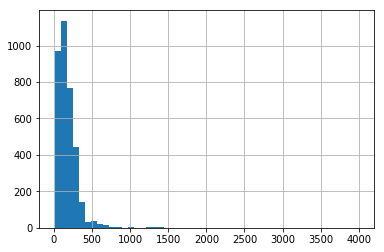

In [338]:
boston_listings.price.hist(bins=50)

Wow, looks like the vast majority are <$1000 but there must be a few high outliers skewing the graph. Let's filter them out and see what the distribution looks like.

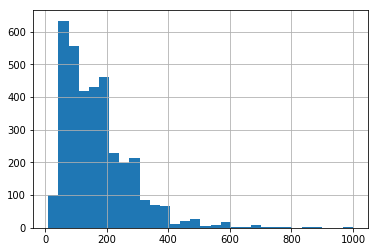

In [346]:
boston_listings[boston_listings.price<1000].price.hist(bins=30)

Zooming in on properties less than $1000 makes it more clear. The vast majority of boston prices are < 400 dollars! We can print some descriptive statistics as a nice summary.

In [358]:
boston_listings.price.describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

That lines up pretty well with what I expected! Now let's move on to trying to see how our features relate to the prices. I'm going to try out a decision tree regression since we have a large number of features that could relate in complex ways to the final price.

## Modeling

First we will make a few imports.

In [151]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

Now we split out the X and y sets and split into test and train groups. Another quick note - decision trees don't require feature scaling, but if other algorithms were used here feature scaling would be critical!

In [40]:
X = boston_listings.drop('price', axis=1)

In [42]:
y = boston_listings['price']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Initialize a decission tree regressor with some fairly conservative parameters.

In [319]:
model = DecisionTreeRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=8)

Fit the model and check the scores!

In [320]:
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

The model does do faily well on the training set, a score of 0.5 is not too shabby.

In [321]:
model.score(X_train, y_train)

0.5403519047090677

However, the test set is not quite as good. The model is still able to explain some of the variance, but it's not nearly as good. There is likely some overfitting, but it's also very likely that the dataset is just hard to predict with the features that I kept.

In [322]:
model.score(X_test, y_test)

0.2184814338716018

We can still wrap this up into a nice function and check out which features were the strongest predictors of higher or lower price.

In [438]:
def dt_reg_get_features(df):
    X = df.drop('price', axis=1)
    y = df['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    
    model = DecisionTreeRegressor(max_depth=8, min_samples_split=15, min_samples_leaf=8)
    model.fit(X_train, y_train)
    
    print('The training score is {0:0.2f}'.format(model.score(X_train, y_train)))
    print('The test score is {0:0.2f}'.format(model.score(X_test, y_test)))
    
    feature_importances = pd.concat((pd.Series(X.columns), pd.Series(model.feature_importances_)), axis=1)
    feature_importances.columns = ['Feature', 'Importance']
    
    return feature_importances.sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [439]:
boston_features = dt_reg_get_features(boston_listings)

The training score is 0.54
The test score is 0.22


In [440]:
boston_features.head(10)

,Feature,Importance
0,room_type_Entire home/apt,0.388968
1,bathrooms,0.177696
2,host_response_rate,0.035793
3,cancellation_policy_super_strict_30,0.034892
4,longitude,0.029931
5,accommodates,0.028466
6,neighbourhood_cleansed_South Boston Waterfront,0.027142
7,reviews,0.024654
8,latitude,0.024434
9,Smoke Detector,0.022673


Looks like the model was able to extract some of the more powerful features, wow! That's pretty great. I'll revisit these features much more in the conclusions and visualization section of this notebook.

## Seattle Comparison

Now let's turn to the Seattle data and see if the same approach works well here.

In [420]:
seattle_dir = 'seattle/'
seattle_calendar_raw, seattle_listings_raw, seattle_reviews_raw = read_airbnb_data(seattle_dir)

In [421]:
seattle_listings_raw.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


On first glance, the data looks really similar! That's good since a difference here would be a lot of work.

In [422]:
seattle_listings_raw.shape

(3818, 92)

However, there are three fewer columns in this dataset. Let's check which ones are missing and if there are any that are just different from the original dataset.

In [428]:
missing_cols = set(boston_listings_raw.columns)^set(seattle_listings_raw.columns)
missing_cols

{'access', 'house_rules', 'interaction'}

Looks like we are lucky, there's just three missing columns. They are also columns that didn't get heavy use in the original Boston data, so we can just fill them with dummy data and then run the same cleaning function!

In [431]:
for col in missing_cols:
    seattle_listings_raw.loc[:, col] = -1

Now we can just run the cleaning function saving us tons of time.

In [432]:
seattle_listings = clean_airbnb_data(seattle_listings_raw)

Now let's take a look at the price distribution in Seattle and see how that compares to Boston.

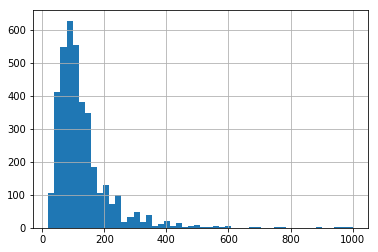

In [433]:
seattle_listings.price.hist(bins=50)

In [441]:
seattle_listings.price.describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

Seems like in general the Airbnbs are less expensive in Seattle than Boston! Let's move on to checking out the model and most important features.

In [434]:
seattle_features = dt_reg_get_features(seattle_listings)

The training score is 0.72
The test score is 0.49


Surprisingly, the model performs much better on the Seattle data than on the Boston data. In this case it could actually be useful to help inform people how much they might want to charge for their Airbnb.

In [435]:
seattle_features.head(10)

,Feature,Importance
14,bedrooms,0.491789
12,accommodates,0.133240
13,bathrooms,0.063790
143,room_type_Entire home/apt,0.062299
9,latitude,0.051193
16,security_deposit,0.027085
17,cleaning_fee,0.025674
10,longitude,0.017984
25,availability_365,0.017088
127,property_type_Apartment,0.014443


## Conclusion and Final Visuals

To start, I'll revisit the questions we started with:
1. What is the distribution of Airbnb prices?
1. What are the top contributing features?
1. Does the price and set of high value features change looking at different cities?
1. Could we use this analysis to help people make their Airbnb rentals more attractive?

#### 1. What is the distribution of Airbnb prices?

We can get this really easily just from the cleaned data!

In [455]:
prices = pd.concat([boston_listings.price, seattle_listings.price], axis=1)
prices.columns=['boston', 'seattle']

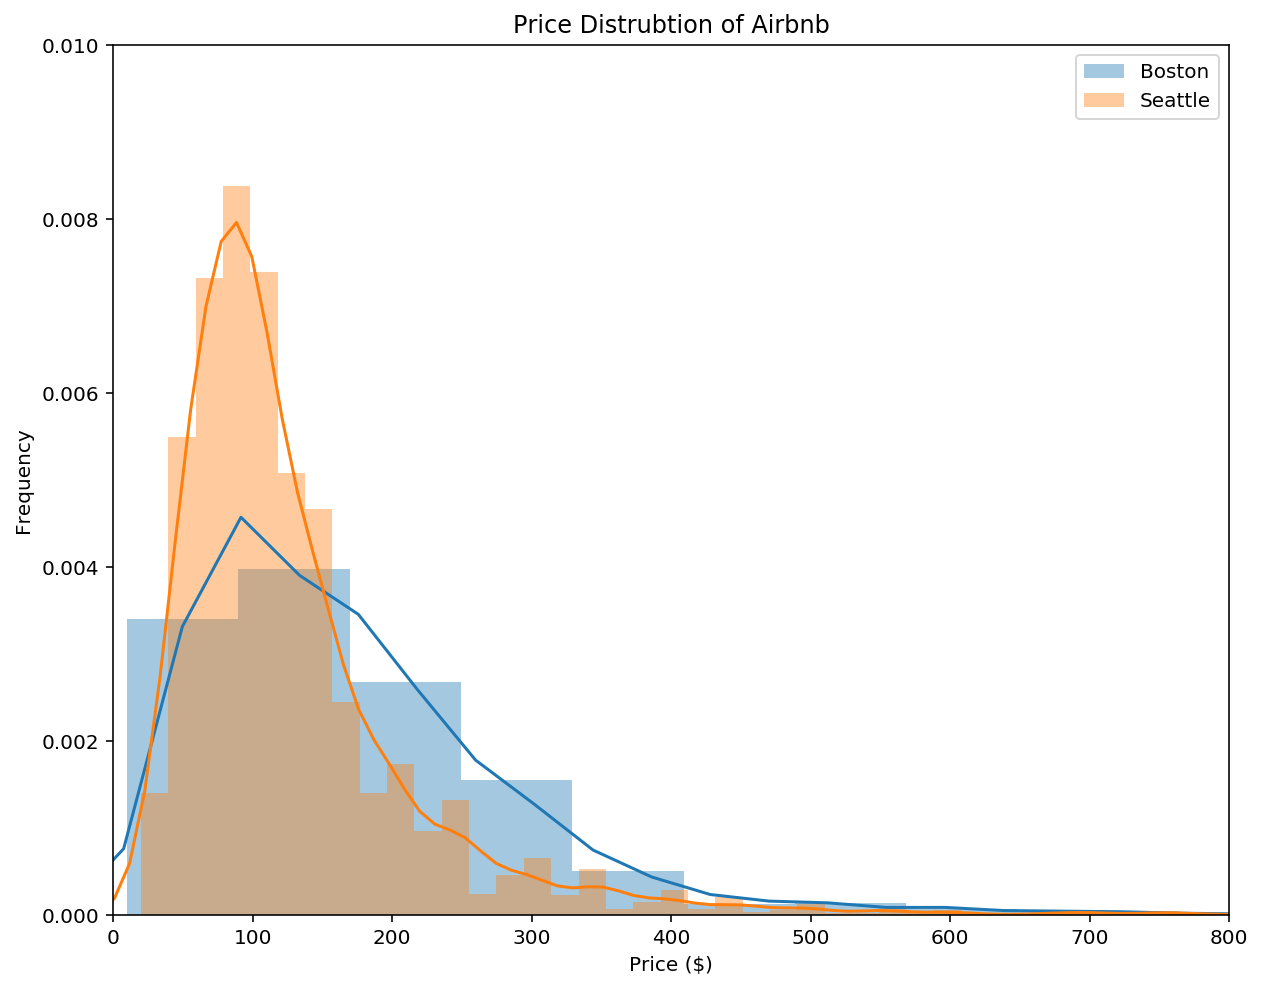

In [487]:
plt.figure(figsize=(10,8))

ax = sns.distplot(boston_listings.price)
sns.distplot(seattle_listings.price, ax=ax)

ax.set_xlim(0, 800)
ax.set_ylim(0, 0.01)

ax.set_title('Price Distrubtion of Airbnb')
ax.set_xlabel('Price ($)')
ax.set_ylabel('Frequency')

plt.legend(labels=['Boston', 'Seattle'])

Looks just like we would expect from our earlier exploration. The Boston data has a similar average but the distribution is slightly wider, resulting in slightly more lower and higher priced apartments.

#### 2. What are the top contributing features?

We already have this for both Boston and Seattle, so we can take a slightly closer look now. Starting with Boston:

Text(0.5,1,'Boston Feature Importances')

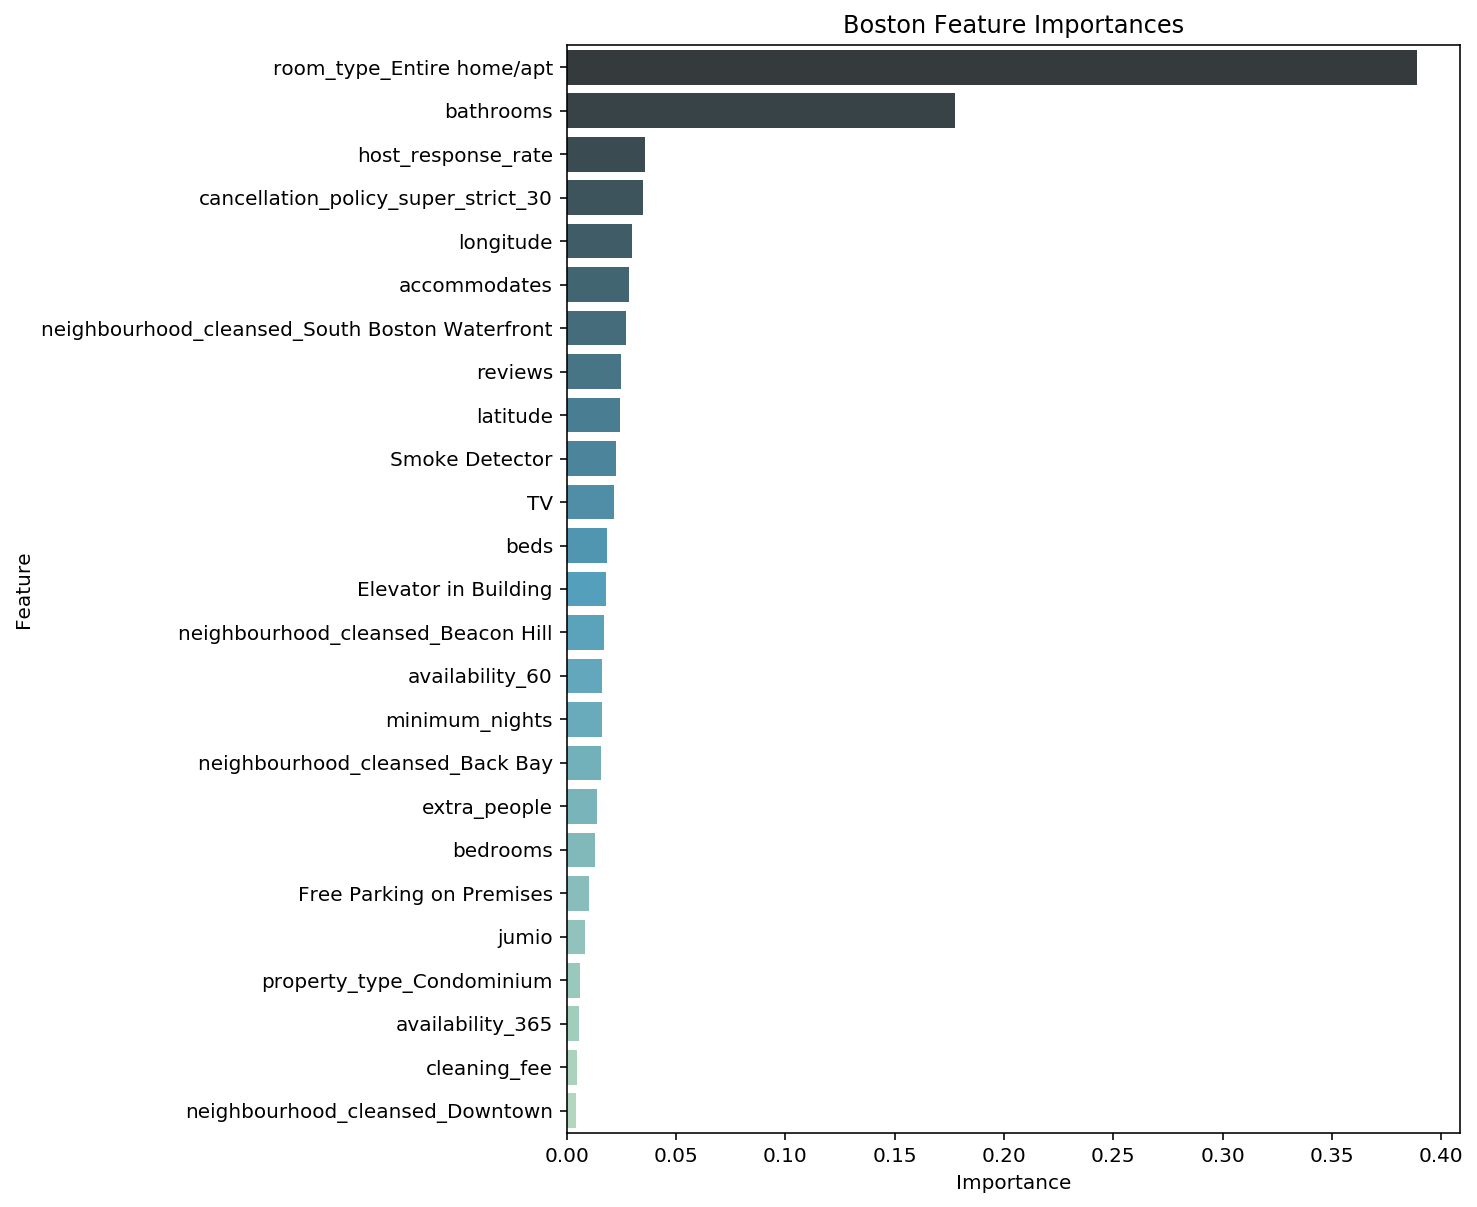

In [507]:
plt.figure(figsize=(8, 10))
ax = sns.barplot(x='Importance',
                 y='Feature',
                 data=boston_features.head(25),
                 palette='GnBu_d')
ax.set_title('Boston Feature Importances')

Looking at the Boston features, renting the entire home and the number of bathrooms are the top two features. Interestingly the host response rate and cancellation policy are also very important in Boston..

Many of the other features relate to the location of the Airbnb and some amenities. Notably Smoke Detector, Elevator and TV all show up as amenities that have a big impact on price in Boston.

Text(0.5,1,'Seattle Feature Importances')

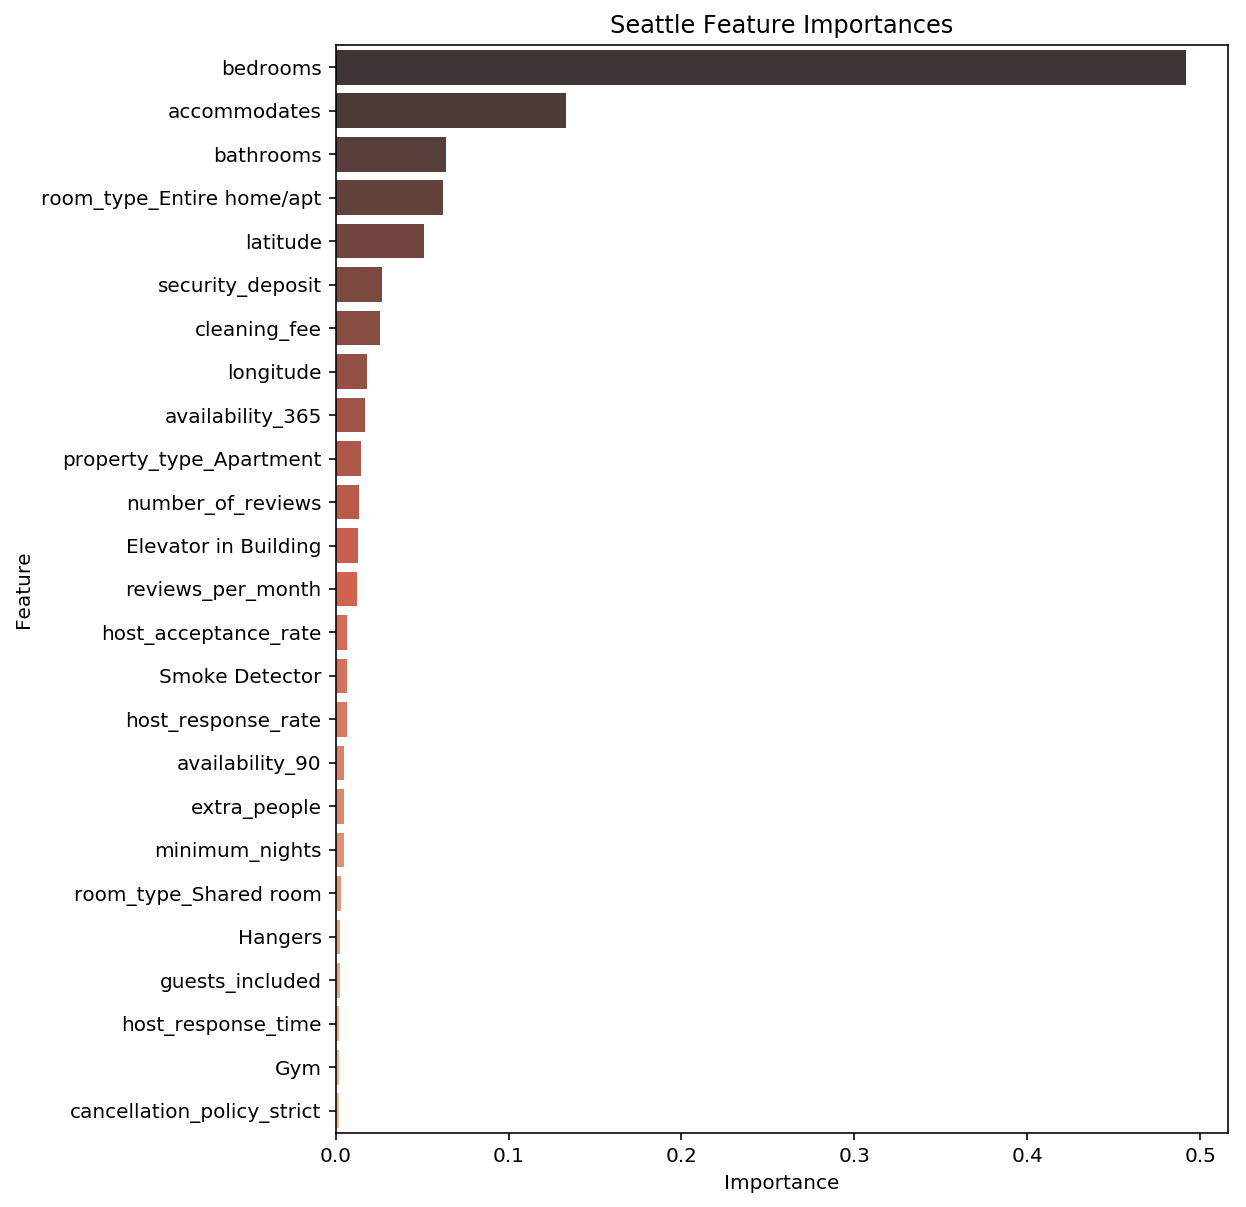

In [511]:
plt.figure(figsize=(8, 10))
ax = sns.barplot(x='Importance',
                 y='Feature',
                 data=seattle_features.head(25),
                 palette='OrRd_d')
ax.set_title('Seattle Feature Importances')

Taking a look at Seattle it's clear that things are quite different! The top two features are both directly related to the number of people that can stay in the Airbnb. That indicates that the size of the apartment is much more directly related to the price in Seattle.

Some similar features appear in this data, including location, Elevator, Smoke Detector and location features.

#### 3. Does the price and set of high value features change looking at different cities?


In [545]:
combined_features = pd.merge(boston_features, seattle_features, on='Feature')
combined_features.columns=['Feature', 'Boston', 'Seattle']

combined_features.loc[:,'Average_Importance'] = (combined_features.Boston + 
                                                 combined_features.Seattle) / 2

combined_features.sort_values(by='Average_Importance', ascending=False, inplace=True)

features = combined_features.drop('Average_Importance', axis=1).melt(id_vars='Feature', 
                                                                     var_name='City', 
                                                                     value_name='Importance')

features = features[features.Feature.isin(combined_features.Feature.head(30))]

Text(0.5,1,'Feature Importance Comparison')

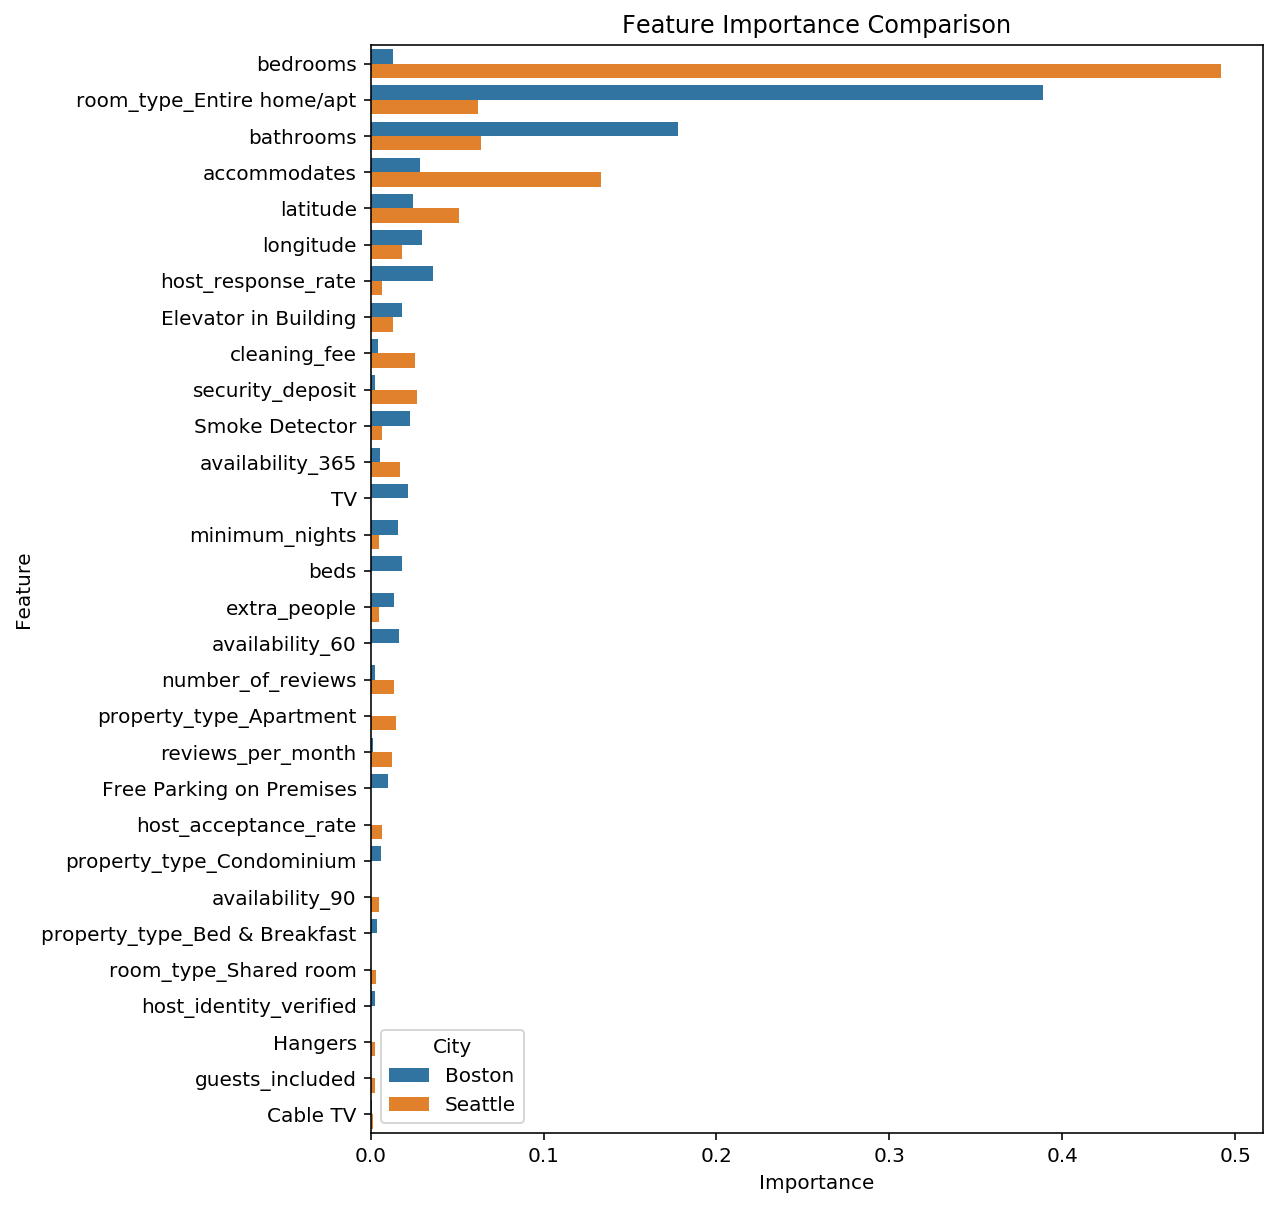

In [549]:
plt.figure(figsize=(8,10))
ax = sns.barplot(x='Importance',
                 y='Feature',
                 hue='City',
                 data=features)
ax.set_title('Feature Importance Comparison')

In this visualization we can directly compare the most important features in each city. It's clear that the size of the apartment is more important in Seattle, however it is still a relatively important feature in Boston. In Boston renting the entire apartment is more important than in Seattle.

The lat/long coordinates are important in both cases. This is probably an interesting follow-up analysis, since I didn't do much work to improve that feature and it was still important.

Other than that the important features are actually quite similar. There wasn't much that was unique in either case.

#### 4. Could we use this analysis to help people make their Airbnb rentals more attractive?

It actually does not look like many of the features are easily changed by the Airbnb hosts. They primarily relate to location and size of the apartment which are not easily tweaked.

It's possible to make a few small recommendations though, like ensuring that the host has smoke detectors on their profile and that they put a TV in the apartment. Also, make sure you consistently respond! Host response rate was an important feature.

In Boston, I would suggest trying to ensure that the Airbnb can be rented in it's entirety, regardless of the size. In Seattle I would focus more on trying to provide a larger space.

## Future Work

It's clear that this is an extremely deep dataset, and this analysis only scratches the surface. Even just within the listings file there are a few things you could try:
- NLP of reviews and listing descriptions
- Location analysis using latitude and longitude
- Scraping photos and seeing if you could determine photo quality

There's even more work if the other files are considered, you could try out:
- If there are listing characteristics that increase booking
- If the bookings or price vary during the year
- How the listings relate to price changes throughout the year

There's even tons more datasets for different cities. It would be really interesting to dive deeply into this data, but I just didn't have the time for this one. That's something for another day!